In [1]:
%run auxiliary.ipynb

Using TensorFlow backend.


## Preprocessing

In [2]:
print("Setting general dataframe...")
all_releases_df = pd.read_csv('all_releases.csv')
print("Total of instances:", all_releases_df.shape[0])
print("... DONE!")

print("Filtering required columns into X features...")
X = all_releases_df.drop(columns=['File', 'Kind', 'Name','Path', 'class_frequency', 'number_of_changes', 'release', 'will_change'])
print("... DONE!")

print("Setting y column containing label of change-proneness...")
y = pd.DataFrame(all_releases_df.loc[:,'will_change'])
print("... DONE!")

print("Declaring a dictionary to save results...")
results_dict = dict()
print("... DONE!")

print("Splitting dataset into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print("General information:")
print("X Train set:", X_train.shape[0], "X Test set:", X_test.shape[0])
print("y Train set:", y_train.shape[0], "y Test set:", y_test.shape[0])
print("... DONE!")

Setting general dataframe...
Total of instances: 10767
... DONE!
Filtering required columns into X features...
... DONE!
Setting y column containing label of change-proneness...
... DONE!
Declaring a dictionary to save results...
... DONE!
Splitting dataset into train and test sets...
General information:
X Train set: 7536 X Test set: 3231
y Train set: 7536 y Test set: 3231
... DONE!


## Outliers removal

In [3]:
wo_outliers_df = pd.DataFrame()
only_1_df = X_train.loc[y_train[y_train.will_change == 1].index]
only_0_df = X_train.loc[y_train[y_train.will_change == 0].index]

Checking outliers in label zero


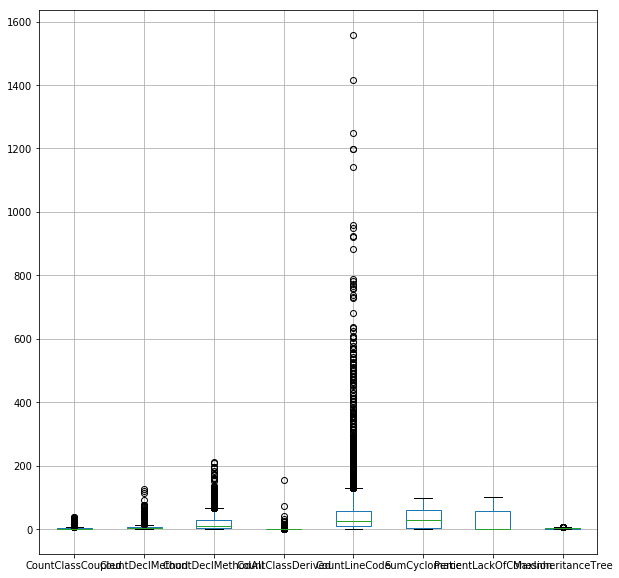

In [4]:
print("Checking outliers in label zero")
boxplot_caps = only_0_df.boxplot(figsize=(10, 10), return_type='dict')['caps']

In [5]:
boxplot_max_list = list()
for i in range(1,16,2):
    boxplot_max_list.append(boxplot_caps[i].get_ydata()[0])

In [6]:
outliers_index_list = outliers_counter(only_0_df)

In [7]:
print("Amount of outliers in label zero")
outliers_index_list.__len__()

Amount of outliers in label zero


403

In [8]:
only_0_df = only_0_df.drop(outliers_index_list)

Checking outliers in label one


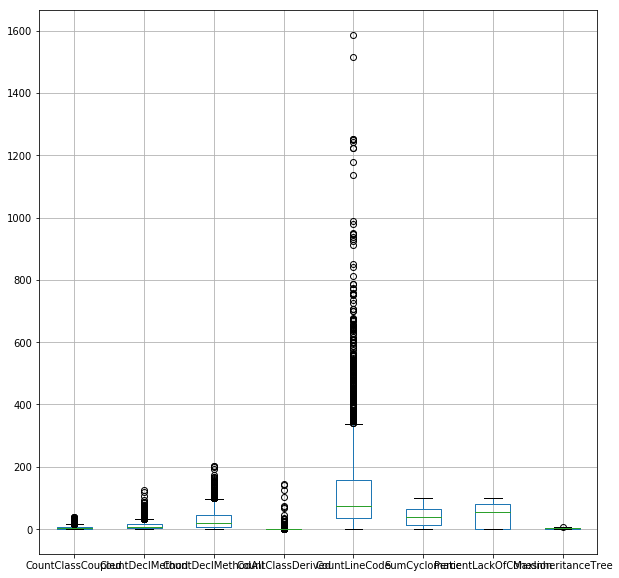

In [9]:
print("Checking outliers in label one")
boxplot_caps = only_1_df.boxplot(figsize=(10, 10), return_type='dict')['caps']

In [10]:
boxplot_max_list = list()
for i in range(1,16,2):
    boxplot_max_list.append(boxplot_caps[i].get_ydata()[0])

In [11]:
outliers_index_list = outliers_counter(only_1_df)

In [12]:
print("Amount of outliers in label one")
outliers_index_list.__len__()

Amount of outliers in label one


242

In [13]:
only_1_df = only_1_df.drop(outliers_index_list)

In [14]:
X_train = wo_outliers_df.append([only_0_df, only_1_df])

In [15]:
y_train = y_train.loc[X_train.index]

In [16]:
print(X_train.shape)
print(y_train.shape)

(6891, 8)
(6891, 1)


In [17]:
print("Scaling features...")
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))
print("... DONE!")

print("Setting stratified k-fold...")
k=5
kf = StratifiedKFold(n_splits=k, shuffle=False, random_state=42)
print("k =", k)
print("... DONE!\n")

Scaling features...
... DONE!
Setting stratified k-fold...
k = 5
... DONE!



## Statistical Analysis

In [18]:
all_releases_df.describe()

,CountClassCoupled,CountDeclMethod,CountDeclMethodAll,CountClassDerived,CountLineCode,SumCyclomatic,PercentLackOfCohesion,MaxInheritanceTree,class_frequency,will_change,number_of_changes,release
count,10767.000000,10767.000000,10767.000000,10767.000000,10767.000000,10767.000000,10767.000000,10767.000000,10767.000000,10767.000000,10767.000000,10767.000000
mean,3.212966,7.791957,23.463453,0.526702,79.394446,36.223553,32.550014,2.168478,3.288195,0.346893,5.302684,7.056283
std,4.262742,10.075647,27.670783,4.996340,127.175324,29.731811,35.272832,1.145320,2.113989,0.476004,3.552433,2.272490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,4.000000,0.000000,13.000000,8.000000,0.000000,1.000000,1.000000,0.000000,0.000000,6.000000
50%,2.000000,4.000000,12.000000,0.000000,37.000000,33.000000,19.000000,2.000000,3.000000,0.000000,6.000000,7.000000
75%,4.000000,10.000000,38.000000,0.000000,89.000000,62.000000,68.000000,3.000000,5.000000,1.000000,8.000000,9.000000
max,40.000000,125.000000,210.000000,166.000000,1586.000000,99.000000,100.000000,7.000000,10.000000,1.000000,10.000000,10.000000


will_change
0    4551
1    2340
Name: will_change, dtype: int64

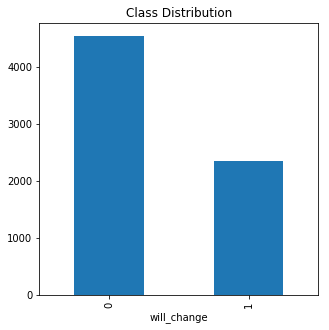

In [19]:
ax = y_train.groupby(['will_change'])['will_change'].count().plot.bar(title="Class Distribution", figsize=(5,5))
y_train.groupby(['will_change'])['will_change'].count()

In [20]:
X_train.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,0,1,2,3,4,5,6,7
0,1.0,0.49,0.34,0.1,0.64,0.17,0.44,0.12
1,0.49,1.0,0.53,0.18,0.85,0.24,0.68,0.079
2,0.34,0.53,1.0,0.091,0.46,0.21,0.34,0.73
3,0.1,0.18,0.091,1.0,0.12,0.066,0.19,-0.0018
4,0.64,0.85,0.46,0.12,1.0,0.28,0.65,0.076
5,0.17,0.24,0.21,0.066,0.28,1.0,0.25,0.086
6,0.44,0.68,0.34,0.19,0.65,0.25,1.0,0.02
7,0.12,0.079,0.73,-0.0018,0.076,0.086,0.02,1.0


## Imbalanced baseline

In [21]:
%%time
LogisticRegr_(X_train, y_train, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.6743012750147767
2 of KFold 5
ROC AUC score: 0.6680097680097681
3 of KFold 5
ROC AUC score: 0.6865384615384617
4 of KFold 5
ROC AUC score: 0.692887667887668
5 of KFold 5
ROC AUC score: 0.6748778998778999

CROSS VALIDANTION SUMMARY:
Mean: 0.679323014465715
Std deviation: 0.009044655384283265

TEST SET:
F1-Score(micro): 0.6861652739090065
F1-Score(macro): 0.646607196789921
F1-Score(weighted): 0.6804566152313216
F1-Score(None): [0.7648423  0.52837209]
Accuracy: 0.6861652739090065
Sensitivity: 0.49262792714657416
Specificity: 0.7935514918190568
Confusion Matrix: [0.7935514918190568, 0.49]
ROC AUC score: 0.6430897094828155
CPU times: user 613 ms, sys: 341 ms, total: 954 ms
Wall time: 126 ms


In [22]:
%%time
DecisionTree_(X_train, y_train, X_test, y_test)

CPU times: user 8 µs, sys: 2 µs, total: 10 µs
Wall time: 2.86 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.6032607165977089
2 of KFold 5
ROC AUC score: 0.6364468864468865
3 of KFold 5
ROC AUC score: 0.6325702075702075
4 of KFold 5
ROC AUC score: 0.6174908424908425
5 of KFold 5
ROC AUC score: 0.6140720390720391

CROSS VALIDANTION SUMMARY:
Mean: 0.6207681384355369
Std deviation: 0.012224567148701413

TEST SET:
F1-Score(micro): 0.6230269266480966
F1-Score(macro): 0.5968710202957745
F1-Score(weighted): 0.626268606414727
F1-Score(None): [0.69955599 0.49418605]
Accuracy: 0.6230269266480966
Sensitivity: 0.5160450997398092
Specificity: 0.6823869104908566
Confusion Matrix: [0.6823869104908566, 0.52]
ROC AUC score: 0.5992160051153329
CPU times: user 294 ms, sys: 209 ms, total: 503 ms
Wall time: 83.7 ms


In [23]:
%%time
RandomForest_(X_train, y_train, X_test, y_test)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 2.62 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.6282520382410612
2 of KFold 5
ROC AUC score: 0.6347680097680097
3 of KFold 5
ROC AUC score: 0.647985347985348
4 of KFold 5
ROC AUC score: 0.6282967032967033
5 of KFold 5
ROC AUC score: 0.6239621489621491

CROSS VALIDANTION SUMMARY:
Mean: 0.6326528496506543
Std deviation: 0.008407506623041898

TEST SET:
F1-Score(micro): 0.698545341999381
F1-Score(macro): 0.641484237580088
F1-Score(weighted): 0.6824318881525054
F1-Score(None): [0.78451327 0.4984552 ]
Accuracy: 0.698545341999381
Sensitivity: 0.419774501300954
Specificity: 0.8532242540904716
Confusion Matrix: [0.8532242540904716, 0.42]
ROC AUC score: 0.6364993776957129
CPU times: user 1.52 s, sys: 9.13 ms, total: 1.53 s
Wall time: 1.53 s


In [24]:
%%time
NN_(X_train, y_train, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.86 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.656427378573372
2 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.670970695970696
3 of KFold 5
ROC AUC score: 0.6671855921855921
4 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6726190476190477
5 of KFold 5
ROC AUC score: 0.6573260073260073

CROSS VALIDANTION SUMMARY:
Mean: 0.664905744334943
Std deviation: 0.006794284233535155

TEST SET:
F1-Score(micro): 0.6994738471061591
F1-Score(macro): 0.6277807431972691
F1-Score(weighted): 0.6745481064664673
F1-Score(None): [0.79113788 0.46442361]
Accuracy: 0.6994738471061591
Sensitivity: 0.36513443191673894
Specificity: 0.884985563041386
Confusion Matrix: [0.884985563041386, 0.37]
ROC AUC score: 0.6250599974790625
CPU times: user 56.5 s, sys: 33.9 s, total: 1min 30s
Wall time: 11.5 s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Undersampling

In [25]:
print("Resampling dataset using Random UnderSampling (RUS)...")
X_RUS, y_RUS = RandomUnderSampler(random_state=42).fit_sample(X_train, y_train.values.ravel())
print("... DONE!")
print("X and Y RUS:", len(X_RUS), len(y_RUS))

Resampling dataset using Random UnderSampling (RUS)...
... DONE!
X and Y RUS: 4680 4680


In [26]:
%%time
LogisticRegr_(X_RUS, y_RUS, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 5


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [27]:
%%time
DecisionTree_(X_RUS, y_RUS, X_test, y_test)

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 4.05 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 5


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [28]:
%%time
RandomForest_(X_RUS, y_RUS, X_test, y_test)

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 2.38 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 5


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [29]:
%%time
NN_(X_RUS, y_RUS, X_test, y_test)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.62 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 5


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [30]:
print("Resampling dataset using Edited Nearest Neighbour (ENN)...")
X_ENN, y_ENN = EditedNearestNeighbours(random_state=42).fit_sample(X_train, y_train.values.ravel())
print("... DONE!")
print("X and Y ENN:", len(X_ENN), len(y_ENN))

Resampling dataset using Edited Nearest Neighbour (ENN)...
... DONE!
X and Y ENN: 4656 4656


In [31]:
%%time
LogisticRegr_(X_ENN, y_ENN, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 5


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [32]:
%%time
DecisionTree_(X_ENN, y_ENN, X_test, y_test)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.62 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 5


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [33]:
%%time
RandomForest_(X_ENN, y_ENN, X_test, y_test)

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 2.62 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 5


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [34]:
%%time
NN_(X_ENN, y_ENN, X_test, y_test)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.38 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 5


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [35]:
print("Resampling dataset using Tomek's Link (TL)...")
X_TL, y_TL = TomekLinks(random_state=42).fit_sample(X_train, y_train.values.ravel())
print("... DONE!")
print("X and Y TL:", len(X_TL), len(y_TL))

Resampling dataset using Tomek's Link (TL)...
... DONE!
X and Y TL: 6510 6510


In [36]:
%%time
LogisticRegr_(X_TL, y_TL, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.6606357315169575
2 of KFold 5
ROC AUC score: 0.6577660948164545
3 of KFold 5
ROC AUC score: 0.6849750968456004
4 of KFold 5
ROC AUC score: 0.6892486011191048
5 of KFold 5
ROC AUC score: 0.6855208141179364

CROSS VALIDANTION SUMMARY:
Mean: 0.6756292676832107
Std deviation: 0.013524588928890427

TEST SET:
F1-Score(micro): 0.6846177653977097
F1-Score(macro): 0.6452772883079776
F1-Score(weighted): 0.6790969363637417
F1-Score(None): [0.7634084  0.52714617]
Accuracy: 0.6846177653977097
Sensitivity: 0.49262792714657416
Specificity: 0.7911453320500481
Confusion Matrix: [0.7911453320500481, 0.49]
ROC AUC score: 0.6418866295983111
CPU times: user 440 ms, sys: 253 ms, total: 693 ms
Wall time: 103 ms


In [37]:
%%time
DecisionTree_(X_TL, y_TL, X_test, y_test)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.34 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.5912303107705407
2 of KFold 5
ROC AUC score: 0.6082057430978294
3 of KFold 5
ROC AUC score: 0.6075293611264834
4 of KFold 5
ROC AUC score: 0.615269323003136
5 of KFold 5
ROC AUC score: 0.600312058045871

CROSS VALIDANTION SUMMARY:
Mean: 0.604509359208772
Std deviation: 0.008154887501017671

TEST SET:
F1-Score(micro): 0.6443825441039925
F1-Score(macro): 0.61475622227676
F1-Score(weighted): 0.6453414317524185
F1-Score(None): [0.72158953 0.50792291]
Accuracy: 0.6443825441039925
Sensitivity: 0.5143104943625325
Specificity: 0.7165543792107796
Confusion Matrix: [0.7165543792107796, 0.51]
ROC AUC score: 0.615432436786656
CPU times: user 80.9 ms, sys: 494 µs, total: 81.4 ms
Wall time: 78.8 ms


In [38]:
%%time
RandomForest_(X_TL, y_TL, X_test, y_test)

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 2.38 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.5912870725131262
2 of KFold 5
ROC AUC score: 0.6401724774026932
3 of KFold 5
ROC AUC score: 0.6266448379757732
4 of KFold 5
ROC AUC score: 0.6209109635368628
5 of KFold 5
ROC AUC score: 0.6112417758101211

CROSS VALIDANTION SUMMARY:
Mean: 0.6180514254477154
Std deviation: 0.016334421035038477

TEST SET:
F1-Score(micro): 0.6895697926338595
F1-Score(macro): 0.6104667089372162
F1-Score(weighted): 0.6607210718626249
F1-Score(None): [0.78600384 0.43492958]
Accuracy: 0.6895697926338595
Sensitivity: 0.3347788378143972
Specificity: 0.8864292589027911
Confusion Matrix: [0.8864292589027911, 0.33]
ROC AUC score: 0.6106040483585942
CPU times: user 1.44 s, sys: 1.94 ms, total: 1.44 s
Wall time: 1.43 s


In [39]:
%%time
NN_(X_TL, y_TL, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.15 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.6365687526607067
2 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6418788046485888
3 of KFold 5
ROC AUC score: 0.6652754719301481
4 of KFold 5
ROC AUC score: 0.6483121195351411
5 of KFold 5
ROC AUC score: 0.6546147697226834

CROSS VALIDANTION SUMMARY:
Mean: 0.6493299836994536
Std deviation: 0.010015914262371245

TEST SET:
F1-Score(micro): 0.6963788300835655
F1-Score(macro): 0.6143678853853163
F1-Score(weighted): 0.6652807201812091
F1-Score(None): [0.79220504 0.43653073]
Accuracy: 0.6963788300835655
Sensitivity: 0.3295750216825672
Specificity: 0.8999037536092397
Confusion Matrix: [0.8999037536092397, 0.33]
ROC AUC score: 0.6147393876459035
CPU times: user 40.3 s, sys: 24.4 s, total: 1min 4s
Wall time: 8.21 s


## Oversampling

In [40]:
print("Resampling dataset using Random OverSampling (ROS)...")
ros = RandomOverSampler(random_state=42)
X_ROS, y_ROS = ros.fit_resample(X_train, y_train)
print("X and Y ROS:", len(X_ROS), len(y_ROS))

Resampling dataset using Random OverSampling (ROS)...
X and Y ROS: 9102 9102


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
%%time
LogisticRegr_NoIloc(X_ROS, y_ROS, X_test, y_test)

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 2.38 µs

LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.6712403951701428
2 of KFold 5
ROC AUC score: 0.6807692307692308
3 of KFold 5
ROC AUC score: 0.6978021978021979
4 of KFold 5
ROC AUC score: 0.6912087912087913
5 of KFold 5
ROC AUC score: 0.6730769230769231

CROSS VALIDANTION SUMMARY:
Mean: 0.6828195076054572
Std deviation: 0.010276755500634728

TEST SET:
F1-Score(micro): 0.6901887960383782
F1-Score(macro): 0.6490682363791724
F1-Score(weighted): 0.6834593011936076
F1-Score(None): [0.7691953  0.52894118]
Accuracy: 0.6901887960383782
Sensitivity: 0.48742411101474414
Specificity: 0.8026948989412896
Confusion Matrix: [0.8026948989412896, 0.49]
ROC AUC score: 0.6450595049780169
CPU times: user 478 ms, sys: 328 ms, total: 806 ms
Wall time: 119 ms


In [42]:
%%time
DecisionTree_NoIloc(X_ROS, y_ROS, X_test, y_test)

CPU times: user 7 µs, sys: 4 µs, total: 11 µs
Wall time: 2.62 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.7486278814489572
2 of KFold 5
ROC AUC score: 0.7445054945054945
3 of KFold 5
ROC AUC score: 0.7774725274725275
4 of KFold 5
ROC AUC score: 0.84010989010989
5 of KFold 5
ROC AUC score: 0.810989010989011

CROSS VALIDANTION SUMMARY:
Mean: 0.7843409609051759
Std deviation: 0.03668720715251041

TEST SET:
F1-Score(micro): 0.6403590219746209
F1-Score(macro): 0.6202787977156987
F1-Score(weighted): 0.6452777310124727
F1-Score(None): [0.7075994 0.5329582]
Accuracy: 0.6403590219746209
Sensitivity: 0.575021682567216
Specificity: 0.6766121270452358
Confusion Matrix: [0.6766121270452358, 0.58]
ROC AUC score: 0.625816904806226
CPU times: user 260 ms, sys: 196 ms, total: 456 ms
Wall time: 99.7 ms


In [43]:
%%time
RandomForest_NoIloc(X_ROS, y_ROS, X_test, y_test)

CPU times: user 5 µs, sys: 3 µs, total: 8 µs
Wall time: 14.5 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.7672886937431393
2 of KFold 5
ROC AUC score: 0.75989010989011
3 of KFold 5
ROC AUC score: 0.7813186813186813
4 of KFold 5
ROC AUC score: 0.8351648351648353
5 of KFold 5
ROC AUC score: 0.8236263736263736

CROSS VALIDANTION SUMMARY:
Mean: 0.7934577387486279
Std deviation: 0.03035980817076283

TEST SET:
F1-Score(micro): 0.678118229650263
F1-Score(macro): 0.6499192788185453
F1-Score(weighted): 0.6783642401264394
F1-Score(None): [0.74927676 0.5505618 ]
Accuracy: 0.678118229650263
Sensitivity: 0.5524718126626192
Specificity: 0.7478344562078922
Confusion Matrix: [0.7478344562078922, 0.55]
ROC AUC score: 0.6501531344352558
CPU times: user 1.99 s, sys: 10.7 ms, total: 2 s
Wall time: 1.99 s


In [44]:
%%time
NN_NoIloc(X_ROS, y_ROS, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.38 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.6717892425905598
2 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7016483516483516
3 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7148351648351648
4 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6994505494505494
5 of KFold 5
ROC AUC score: 0.6917582417582417

CROSS VALIDANTION SUMMARY:
Mean: 0.6958963100565736
Std deviation: 0.014161024903024502

TEST SET:
F1-Score(micro): 0.6966883317858248
F1-Score(macro): 0.6714806373216289
F1-Score(weighted): 0.6975332824382559
F1-Score(None): [0.76248182 0.58047945]
Accuracy: 0.6966883317858248
Sensitivity: 0.588031222896791
Specificity: 0.7569778633301251
Confusion Matrix: [0.7569778633301251, 0.59]
ROC AUC score: 0.6725045431134582
CPU times: user 1min 19s, sys: 49.3 s, total: 2min 9s
Wall time: 16.5 s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [45]:
print("Resampling dataset using SMOTE (SMO)...")
sm = SMOTE(random_state=42)
X_SMO, y_SMO = sm.fit_resample(X_train, y_train)
print("X and Y SMO:", len(X_SMO), len(y_SMO))

Resampling dataset using SMOTE (SMO)...
X and Y SMO: 9102 9102


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
%%time
LogisticRegr_NoIloc(X_SMO, y_SMO, X_test, y_test)

CPU times: user 7 µs, sys: 4 µs, total: 11 µs
Wall time: 3.58 µs

LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.6739846322722284
2 of KFold 5
ROC AUC score: 0.6813186813186813
3 of KFold 5
ROC AUC score: 0.6923076923076923
4 of KFold 5
ROC AUC score: 0.6807692307692308
5 of KFold 5
ROC AUC score: 0.665934065934066

CROSS VALIDANTION SUMMARY:
Mean: 0.6788628605203799
Std deviation: 0.008733609166940803

TEST SET:
F1-Score(micro): 0.6904982977406375
F1-Score(macro): 0.6496707273490602
F1-Score(weighted): 0.683909623642994
F1-Score(None): [0.76926627 0.53007519]
Accuracy: 0.6904982977406375
Sensitivity: 0.4891587163920208
Specificity: 0.802213666987488
Confusion Matrix: [0.802213666987488, 0.49]
ROC AUC score: 0.6456861916897544
CPU times: user 776 ms, sys: 536 ms, total: 1.31 s
Wall time: 170 ms


In [47]:
%%time
DecisionTree_NoIloc(X_SMO, y_SMO, X_test, y_test)

CPU times: user 8 µs, sys: 5 µs, total: 13 µs
Wall time: 3.1 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.6558726673984633
2 of KFold 5
ROC AUC score: 0.6653846153846154
3 of KFold 5
ROC AUC score: 0.7164835164835165
4 of KFold 5
ROC AUC score: 0.7818681318681318
5 of KFold 5
ROC AUC score: 0.7763736263736264

CROSS VALIDANTION SUMMARY:
Mean: 0.7191965115016706
Std deviation: 0.05312239490483695

TEST SET:
F1-Score(micro): 0.5515320334261838
F1-Score(macro): 0.5512429887093743
F1-Score(weighted): 0.5545035541124094
F1-Score(None): [0.56263206 0.53985392]
Accuracy: 0.5515320334261838
Sensitivity: 0.7372072853425846
Specificity: 0.44850818094321465
Confusion Matrix: [0.44850818094321465, 0.74]
ROC AUC score: 0.5928577331428996
CPU times: user 365 ms, sys: 145 ms, total: 510 ms
Wall time: 144 ms


In [48]:
%%time
RandomForest_NoIloc(X_SMO, y_SMO, X_test, y_test)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.6750823271130625
2 of KFold 5
ROC AUC score: 0.6873626373626374
3 of KFold 5
ROC AUC score: 0.7494505494505495
4 of KFold 5
ROC AUC score: 0.8478021978021978
5 of KFold 5
ROC AUC score: 0.8274725274725274

CROSS VALIDANTION SUMMARY:
Mean: 0.7574340478401949
Std deviation: 0.07046607109288149

TEST SET:
F1-Score(micro): 0.5391519653358093
F1-Score(macro): 0.5360071099246234
F1-Score(weighted): 0.525071052573695
F1-Score(None): [0.49780776 0.57420646]
Accuracy: 0.5391519653358093
Sensitivity: 0.8707718993928881
Specificity: 0.3551491819056785
Confusion Matrix: [0.3551491819056785, 0.87]
ROC AUC score: 0.6129605406492833
CPU times: user 2.42 s, sys: 4.01 ms, total: 2.43 s
Wall time: 2.43 s


In [49]:
%%time
NN_NoIloc(X_SMO, y_SMO, X_test, y_test)

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 2.62 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6783754116355653
2 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6978021978021978
3 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7175824175824176
4 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6912087912087911
5 of KFold 5
ROC AUC score: 0.6857142857142856

CROSS VALIDANTION SUMMARY:
Mean: 0.6941366207886515
Std deviation: 0.013349647712638264

TEST SET:
F1-Score(micro): 0.691736304549675
F1-Score(macro): 0.6672183252687216
F1-Score(weighted): 0.6930782235981195
F1-Score(None): [0.75754625 0.5768904 ]
Accuracy: 0.691736304549675
Sensitivity: 0.5888985255854293
Specificity: 0.7487969201154957
Confusion Matrix: [0.7487969201154957, 0.59]
ROC AUC score: 0.6688477228504623
CPU times: user 1min 21s, sys: 50.1 s, total: 2min 12s
Wall time: 16.8 s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [50]:
print("Resampling dataset using ADASYN (ADA)...")
ada = ADASYN(random_state=42)
X_ADA, y_ADA = ada.fit_resample(X_train, y_train)
print("X and Y ADA:", len(X_ADA), len(y_ADA))

Resampling dataset using ADASYN (ADA)...
X and Y ADA: 8836 8836


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
%%time
LogisticRegr_NoIloc(X_ADA, y_ADA, X_test, y_test)

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 2.86 µs

LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.676738475805243
2 of KFold 5
ROC AUC score: 0.683280546757793
3 of KFold 5
ROC AUC score: 0.6606344647184788
4 of KFold 5
ROC AUC score: 0.6056278610537653
5 of KFold 5
ROC AUC score: 0.5950466103324914

CROSS VALIDANTION SUMMARY:
Mean: 0.6442655917335542
Std deviation: 0.0367694908327961

TEST SET:
F1-Score(micro): 0.688331785824822
F1-Score(macro): 0.6551675787148277
F1-Score(weighted): 0.6857832389710599
F1-Score(None): [0.76210725 0.5482279 ]
Accuracy: 0.688331785824822
Sensitivity: 0.5299219427580225
Specificity: 0.7762271414821944
Confusion Matrix: [0.7762271414821944, 0.53]
ROC AUC score: 0.6530745421201085
CPU times: user 721 ms, sys: 462 ms, total: 1.18 s
Wall time: 163 ms


In [52]:
%%time
DecisionTree_NoIloc(X_ADA, y_ADA, X_test, y_test)

CPU times: user 10 µs, sys: 6 µs, total: 16 µs
Wall time: 3.58 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.648906724117393
2 of KFold 5
ROC AUC score: 0.6526760870401478
3 of KFold 5
ROC AUC score: 0.6859598394604228
4 of KFold 5
ROC AUC score: 0.745809558003257
5 of KFold 5
ROC AUC score: 0.7468289586725992

CROSS VALIDANTION SUMMARY:
Mean: 0.696036233458764
Std deviation: 0.04303512852326949

TEST SET:
F1-Score(micro): 0.5376044568245125
F1-Score(macro): 0.5372373713939496
F1-Score(weighted): 0.5409687342870342
F1-Score(None): [0.55027092 0.52420382]
Accuracy: 0.5376044568245125
Sensitivity: 0.7137901127493496
Specificity: 0.43984600577478344
Confusion Matrix: [0.43984600577478344, 0.71]
ROC AUC score: 0.5768180592620665
CPU times: user 353 ms, sys: 166 ms, total: 519 ms
Wall time: 150 ms


In [53]:
%%time
RandomForest_NoIloc(X_ADA, y_ADA, X_test, y_test)

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 2.86 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.6851697200173684
2 of KFold 5
ROC AUC score: 0.6974136715093541
3 of KFold 5
ROC AUC score: 0.7254407785913036
4 of KFold 5
ROC AUC score: 0.8265441676176799
5 of KFold 5
ROC AUC score: 0.8130457640375961

CROSS VALIDANTION SUMMARY:
Mean: 0.7495228203546604
Std deviation: 0.05899844397990845

TEST SET:
F1-Score(micro): 0.49520272361497986
F1-Score(macro): 0.48685905228987614
F1-Score(weighted): 0.4681262950672522
F1-Score(None): [0.42142604 0.55229207]
Accuracy: 0.49520272361497986
Sensitivity: 0.8725065047701648
Specificity: 0.2858517805582291
Confusion Matrix: [0.2858517805582291, 0.87]
ROC AUC score: 0.5791791426641969
CPU times: user 2.44 s, sys: 41 µs, total: 2.44 s
Wall time: 2.43 s


In [54]:
%%time
NN_NoIloc(X_ADA, y_ADA, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.62 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.68020447608447
2 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7026074858630286
3 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6891321630528164
4 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6284835934194161
5 of KFold 5
ROC AUC score: 0.6067831818123534

CROSS VALIDANTION SUMMARY:
Mean: 0.6614421800464169
Std deviation: 0.037113921471303137

TEST SET:
F1-Score(micro): 0.6926648096564532
F1-Score(macro): 0.6680397365286833
F1-Score(weighted): 0.6939240463504868
F1-Score(None): [0.75845293 0.57762654]
Accuracy: 0.6926648096564532
Sensitivity: 0.5888985255854293
Specificity: 0.7502406159769008
Confusion Matrix: [0.7502406159769008, 0.59]
ROC AUC score: 0.6695695707811651
CPU times: user 1min 17s, sys: 45.5 s, total: 2min 3s
Wall time: 15.5 s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
